In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #z-score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
#log , căn, bậc 2 3, sigmoid
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import numpy as np

Error in callback <function _enable_matplotlib_integration.<locals>.configure_once at 0x000002A657956A20> (for post_run_cell), with arguments args (<ExecutionResult object at 2a6598b3dd0, execution_count=11 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 2a6598b2570, raw_cell="import pandas as pd
import seaborn as sns
import m.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/d%3A/demo_DataScience/ltptdl1/python_Data/Thick_ptdl1.ipynb#W0sZmlsZQ%3D%3D> result=None>,),kwargs {}:


AttributeError: module 'matplotlib' has no attribute 'backends'

In [5]:
#Run pip install openpyxl
# Đọc file Excel vào data frame
df = pd.read_excel('mysales.xlsx')
df

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,East,West Virginia,Fairmont,26554,2015-04-04,2015-04-04,-24.7104,15,135.78,87537


In [10]:
# Giả sử df là DataFrame của bạn
# df = ...
# Lấy các cột số liệu
numeric_columns = ['Discount', 'Unit Price', 'Shipping Cost', 'Quantity ordered new', 'Sales']
# In ra thống kê mô tả
df[numeric_columns].describe()

,Discount,Unit Price,Shipping Cost,Quantity ordered new,Sales
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,0.048975,109.079221,12.968151,12.944672,985.828832
std,0.031378,393.481301,17.414631,13.871565,2559.900167
min,0.000000,1.140000,0.490000,1.000000,2.250000
25%,0.020000,6.480000,3.230000,5.000000,58.807500
50%,0.050000,20.990000,6.150000,10.000000,202.395000
75%,0.080000,100.972500,14.362500,16.000000,802.945000
max,0.210000,6783.020000,164.730000,167.000000,45737.330000


Error in callback <function _enable_matplotlib_integration.<locals>.configure_once at 0x000002A657956A20> (for post_run_cell), with arguments args (<ExecutionResult object at 2a65979ebd0, execution_count=10 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 2a65979ffe0, raw_cell="# Giả sử df là DataFrame của bạn
# df = ...
# Lấy .." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/d%3A/demo_DataScience/ltptdl1/python_Data/Thick_ptdl1.ipynb#W1sZmlsZQ%3D%3D> result=          Discount   Unit Price  Shipping Cost  Quantity ordered new  \
count  1952.000000  1952.000000    1952.000000           1952.000000   
mean      0.048975   109.079221      12.968151             12.944672   
std       0.031378   393.481301      17.414631             13.871565   
min       0.000000     1.140000       0.490000              1.000000   
25%       0.020000     6.480000       3.230000              5.000000   
50%       0.050000    20.990000       6.150000 

AttributeError: module 'matplotlib' has no attribute 'backends'

In [8]:

# Giả sử df là DataFrame của bạn
# df = ...
# Lấy các cột số liệu
numeric_columns = ['Discount', 'Unit Price', 'Shipping Cost', 'Quantity ordered new', 'Sales']
for col in numeric_columns:
    # Kiểm định Shapiro-Wilk
    stat, p_value = shapiro(df[col])
    
    # In kết quả
    print(f'{col}: Statistics={stat:.4f}, p-value={p_value:.4f}')
    
    # Kiểm tra mức ý nghĩa
    alpha = 0.05
    if p_value > alpha:
        print(f'   Phân phối của {col} gần với phân phối chuẩn.\n')
    else:
        print(f'   Phân phối của {col} không gần với phân phối chuẩn.\n')

Discount: Statistics=0.9441, p-value=0.0000
   Phân phối của Discount không gần với phân phối chuẩn.

Unit Price: Statistics=0.2189, p-value=0.0000
   Phân phối của Unit Price không gần với phân phối chuẩn.

Shipping Cost: Statistics=0.6639, p-value=0.0000
   Phân phối của Shipping Cost không gần với phân phối chuẩn.

Quantity ordered new: Statistics=0.6824, p-value=0.0000
   Phân phối của Quantity ordered new không gần với phân phối chuẩn.

Sales: Statistics=0.3668, p-value=0.0000
   Phân phối của Sales không gần với phân phối chuẩn.



In [10]:
df.rename(columns={'Order Priority':'Priority','Shipping Mode':'Mode',
                   'Unit Price':'Price','Shipping Cost':'ShipCost','Quantity ordered new':'Quantity'},inplace=True)
df[['Discount','Price','ShipCost','Quantity','Sales']].iloc[20]

Discount     0.01
Price       17.98
ShipCost     8.51
Quantity     2.00
Sales       40.17
Name: 20, dtype: float64

In [11]:
df.shape

(1952, 25)

In [12]:
# Giả sử df là DataFrame của bạn
# df = ...
# Kiểm tra dữ liệu thiếu cho mỗi biến số
missing_values = df.isnull().sum()
# Lọc ra các biến số có dữ liệu thiếu
variables_with_missing_data = missing_values[missing_values > 0]
# In số lượng biến số có dữ liệu thiếu
num_variables_with_missing_data = len(variables_with_missing_data)
print(f'Số biến số có dữ liệu thiếu: {num_variables_with_missing_data}')
print('Biến số và số lượng dữ liệu thiếu cho mỗi biến:')
print(variables_with_missing_data)


Số biến số có dữ liệu thiếu: 1
Biến số và số lượng dữ liệu thiếu cho mỗi biến:
Product Base Margin    16
dtype: int64


In [13]:

# Giả sử df là DataFrame của bạn
# df = ...

# Danh sách biến số số học
numeric_columns = ['Discount', 'Price', 'ShipCost', 'Quantity', 'Sales']
# Tính độ lệch cho từng biến số
skewness_values = df[numeric_columns].skew()
# Xác định biến số có độ lệch nhiều nhất
max_skewness_variable = skewness_values.idxmax()
max_skewness_value = skewness_values.max()
print(f'Biến số có độ lệch nhiều nhất là {max_skewness_variable} với giá trị độ lệch là {max_skewness_value:.2f}')

Biến số có độ lệch nhiều nhất là Price với giá trị độ lệch là 12.14


In [14]:
# Giả sử df là DataFrame của bạn
# df = ...
# Danh sách biến số số học
numeric_columns = ['Discount', 'Price', 'ShipCost', 'Quantity', 'Sales']

# Tính ma trận tương quan Pearson
correlation_matrix = df[numeric_columns].corr()

# Tìm cặp giá trị có tương quan lớn nhất không nằm trên đường chéo
max_correlation = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
max_correlation = max_correlation[max_correlation.index.get_level_values(0) != max_correlation.index.get_level_values(1)].idxmax()

print(f'Cặp giá trị có tương quan lớn nhất không nằm trên đường chéo: {max_correlation} với giá trị tương quan là {correlation_matrix.loc[max_correlation]}')


Cặp giá trị có tương quan lớn nhất không nằm trên đường chéo: ('Price', 'Sales') với giá trị tương quan là 0.4435090390634774


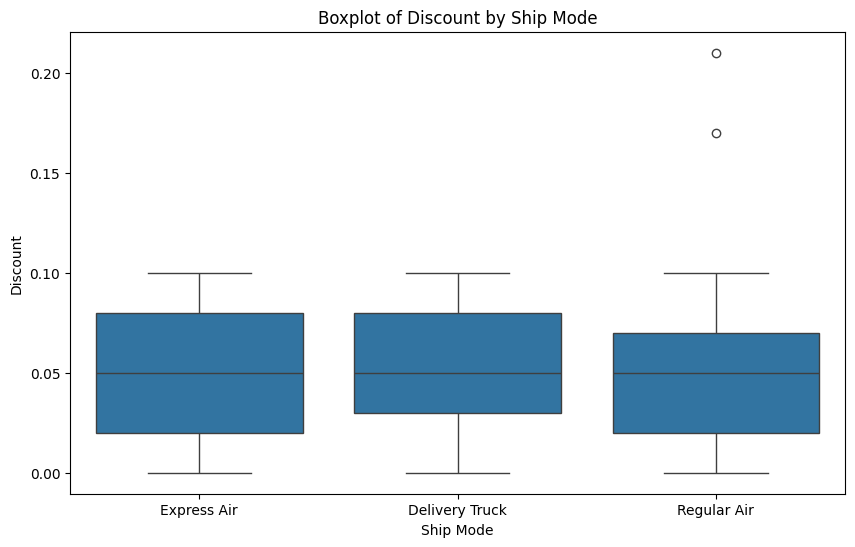

In [15]:
# Giả sử df là DataFrame của bạn chứa thông tin về 'Discount' và 'Ship Mode'
# df = ...
# Vẽ biểu đồ Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship Mode', y='Discount', data=df)
plt.title('Boxplot of Discount by Ship Mode')
plt.show()

In [16]:
# Giả sử df là DataFrame của bạn chứa thông tin về 'Discount' và 'Ship Mode'
# df = ...
# Groupby theo 'Ship Mode' và tính mô tả thống kê cho 'Discount'
grouped_discount = df.groupby('Ship Mode')['Discount'].describe()
# In thông tin mô tả thống kê
print(grouped_discount)
# Tìm nhóm có giá trị lớn nhất
max_discount_group = grouped_discount['max'].idxmax()
max_discount_value = grouped_discount['max'].max()
print(f'\nNhóm có giá trị lớn nhất là {max_discount_group} với giá trị {max_discount_value:.2f}')
# Kiểm tra xem Ship Mode có giúp dự báo giá trị Discount hay không
# Có thể sử dụng các phương pháp thống kê như ANOVA để kiểm tra sự khác biệt giữa các nhóm


                 count      mean       std  min   25%   50%   75%   max
Ship Mode                                                              
Delivery Truck   275.0  0.051818  0.030512  0.0  0.03  0.05  0.08  0.10
Express Air      240.0  0.051333  0.032159  0.0  0.02  0.05  0.08  0.10
Regular Air     1437.0  0.048038  0.031378  0.0  0.02  0.05  0.07  0.21

Nhóm có giá trị lớn nhất là Regular Air với giá trị 0.21


In [17]:
df['Priority']

0                High
1       Not Specified
2            Critical
3              Medium
4              Medium
            ...      
1947             High
1948             High
1949    Not Specified
1950           Medium
1951             High
Name: Priority, Length: 1952, dtype: object

In [18]:
df[['Price', 'ShipCost', 'Quantity', 'Sales']]

,Price,ShipCost,Quantity,Sales
0,2.84,0.93,4,13.01
1,500.98,26.00,12,6362.85
2,9.48,7.29,22,211.15
3,78.69,19.99,16,1164.45
4,3.28,2.31,7,22.23
...,...,...,...,...
1947,10.90,7.46,18,207.31
1948,7.99,5.03,22,143.12
1949,11.97,5.81,5,59.98
1950,9.38,4.93,15,135.78


In [19]:
df['Discount']

0       0.01
1       0.02
2       0.06
3       0.09
4       0.08
        ... 
1947    0.01
1948    0.10
1949    0.08
1950    0.10
1951    0.10
Name: Discount, Length: 1952, dtype: float64

In [20]:
X=df[['Price', 'ShipCost', 'Quantity', 'Sales']].values
y=df['Discount'].values
# mức 20% random=16
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=16)

In [21]:

#poly degree=2, np.sqrt, minmaxscaler, standardscaler, LR
steps=[('standardscaler',StandardScaler()),('minmaxscaler',MinMaxScaler()),('sqrttransform',FunctionTransformer(np.sqrt)),('model',LinearRegression())]
#('minmaxscaler',MinMaxScaler()),

In [22]:
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('minmaxscaler', MinMaxScaler()),
                ('sqrttransform', FunctionTransformer(func=<ufunc 'sqrt'>)),
                ('model', LinearRegression())])

In [23]:
model=pipe.fit(X_train,y_train)
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('minmaxscaler', MinMaxScaler()),
                ('sqrttransform', FunctionTransformer(func=<ufunc 'sqrt'>)),
                ('model', LinearRegression())])

In [24]:
# Dự đoán trên tập test
y_test_pred = model.predict(X_test)
#giá trị score
# Tính giá trị R-squared (score)
r2 = model.score(X_test, y_test)
# In giá trị R-squared
print(f'Giá trị R-squared trên tập test: {r2:.4f}')

Giá trị R-squared trên tập test: -0.0002


In [26]:

# print('Mức độ nhóm của các đặc trưng:')
# for feature, min_val, max_val in zip(['Price', 'ShipCost', 'Quantity', 'Sales'], min_values, max_values):
#     print(f'{feature}: Min = {min_val:.4f}, Max = {max_val:.4f}')


In [27]:
coefficients = model.named_steps['model'].coef_
intercept = model.named_steps['model'].intercept_
print("Coefficients góc:", coefficients)
print("Intercept tự do:", intercept)

Coefficients góc: [ 0.02431225  0.01034315  0.01409403 -0.03575341]
Intercept tự do: 0.044990525821563376


In [28]:
# In hệ số của mô hình
coefficients = model.named_steps['model'].coef_

# In hệ số chặn (intercept)
intercept = model.named_steps['model'].intercept_

print('Hệ số của mô hình:')
for feature, coefficient in zip(['Price', 'ShipCost', 'Quantity', 'Sales'], coefficients):
    print(f'{feature}: {coefficient:.4f}')

print(f'Chặn (intercept): {intercept:.4f}')


Hệ số của mô hình:
Price: 0.0243
ShipCost: 0.0103
Quantity: 0.0141
Sales: -0.0358
Chặn (intercept): 0.0450


In [29]:
y_test_pred=pipe.predict(X_test)
y_train_pred=pipe.predict(X_train)

In [30]:
print('Value Training')
print('Score or R-Squared: ', model.score(X_train,y_train))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_train,y_train_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_train,y_train_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Value Training
Score or R-Squared:  0.003584630984168391
Mean Absolute Error:  0.02682312780034355
Mean Squared Error:  0.000978582194280162
Root Mean Squared Error:  0.031282298417478246
Mean Absolute Percentage Error:  18005417765292.703


In [ ]:
import pandas as pd

# Giả sử df là DataFrame của bạn
# df = ...

integer_columns = df.select_dtypes(include='int64').columns
print(f'Số lượng biến số kiểu số nguyên: {len(integer_columns)}')
print('Các biến số kiểu số nguyên:')
print(integer_columns)


Số lượng biến số kiểu số nguyên: 5
Các biến số kiểu số nguyên:
Index(['Row ID', 'Customer ID', 'Postal Code', 'Quantity', 'Order ID'], dtype='object')


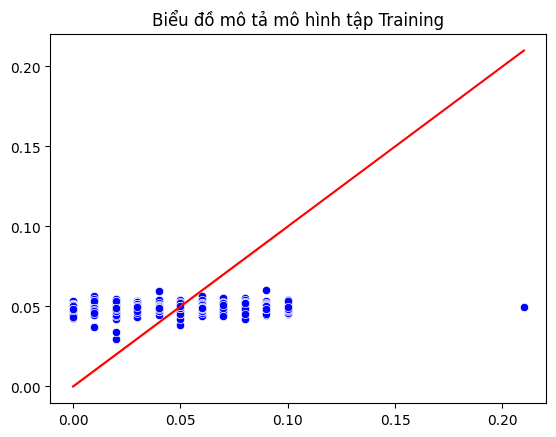

In [32]:
# PP đánh giá 2: Dùng Scatter giữa Actual và Predict
sns.scatterplot(x=y_train.flatten(), y=y_train_pred.flatten(), markers='o', color='b')
sns.lineplot(x=y_train.flatten(), y=y_train.flatten(), markers='s', color='r')
plt.title('Biểu đồ mô tả mô hình tập Training')
plt.show()

In [34]:
price=18.98
shipCost=8.51
quantity=50.17
sales=2.0
predicted_Discount=pipe.predict([[price,shipCost,quantity,sales]])
print('Giá trị dự báo điểm Discount: ',predicted_Discount)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:379: RuntimeWarning: invalid value encountered in sqrt
  return func(X, **(kw_args if kw_args else {}))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

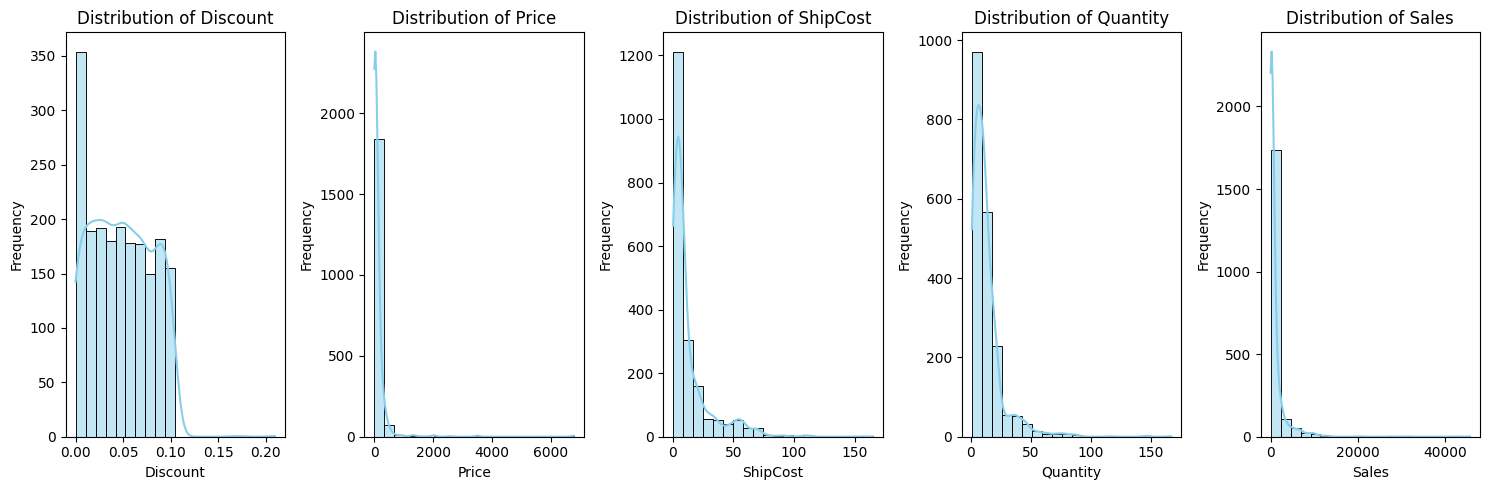

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
# Giả sử df là DataFrame của bạn
# df = ...

# Chọn các cột cần vẽ phân phối
columns = ['Discount', 'Price', 'ShipCost', 'Quantity', 'Sales']
# Vẽ phân phối cho từng cột
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

for i, column in enumerate(columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Giả sử df là DataFrame của bạn
# df = ...

# Chọn các đặc trưng và biến mục tiêu
features = ['Price', 'ShipCost', 'Quantity', 'Sales']
target = 'Discount'

# Chia dữ liệu thành tập train và tập test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=16)

# Xử lý Z-score cho giá trị đầu vào tập train
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(train_df[features], train_df[target])

# Dự đoán trên tập test
test_df[features] = scaler.transform(test_df[features])
predictions = model.predict(test_df[features])

# Tính giá trị R-squared (Score)
r2 = r2_score(test_df[target], predictions)

# In mức độ lệch của các đặc trưng
print('Mức độ lệch của các đặc trưng sau khi xử lý Z-score:')
print(train_df[features].mean())
print(train_df[features].std())

# In giá trị R-squared
print(f'\nGiá trị R-squared trên tập test: {r2:.4f}')


Mức độ lệch của các đặc trưng sau khi xử lý Z-score:
Price       1.536247e-17
ShipCost   -8.193318e-17
Quantity   -6.827765e-18
Sales      -4.551843e-18
dtype: float64
Price       1.00032
ShipCost    1.00032
Quantity    1.00032
Sales       1.00032
dtype: float64

Giá trị R-squared trên tập test: -0.0007


In [37]:
# Chuyển đổi giá trị của các đặc trưng bằng StandardScaler
scaled_values = scaler.transform(X_train)

# Tính mức độ lệch sau khi xử lý Z-score
mean_values = np.mean(scaled_values, axis=0)
std_dev_values = np.std(scaled_values, axis=0)

# In mức độ lệch của các đặc trưng
print('Mức độ lệch của các đặc trưng sau khi xử lý Z-score câu cuối:')
for feature, mean, std_dev in zip(['Price', 'ShipCost', 'Quantity', 'Sales'], mean_values, std_dev_values):
    print(f'{feature}: Mean = {mean:.4f}, Std Dev = {std_dev:.4f}')


Mức độ lệch của các đặc trưng sau khi xử lý Z-score câu cuối:
Price: Mean = 0.0000, Std Dev = 1.0000
ShipCost: Mean = -0.0000, Std Dev = 1.0000
Quantity: Mean = -0.0000, Std Dev = 1.0000
Sales: Mean = -0.0000, Std Dev = 1.0000


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
